In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardata/cardata.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
data_car=pd.read_csv('/kaggle/input/cardata/cardata.csv')
data_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data_car.shape

(301, 9)

In [5]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print(data_car[["Fuel_Type", "Seller_Type", "Transmission"]].value_counts().to_markdown())

|                                       |   0 |
|:--------------------------------------|----:|
| ('Petrol', 'Dealer', 'Manual')        | 116 |
| ('Petrol', 'Individual', 'Manual')    |  95 |
| ('Diesel', 'Dealer', 'Manual')        |  48 |
| ('Petrol', 'Dealer', 'Automatic')     |  18 |
| ('Diesel', 'Dealer', 'Automatic')     |  11 |
| ('Petrol', 'Individual', 'Automatic') |  10 |
| ('CNG', 'Dealer', 'Manual')           |   2 |
| ('Diesel', 'Individual', 'Automatic') |   1 |


In [7]:
data_car.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
data_car.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
data_car.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)
data_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
X=data_car.drop(['Car_Name','Selling_Price'],axis=1)
Y=data_car['Selling_Price']
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [9]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [10]:
X_train, X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.1,random_state=2)

In [11]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
training_prediction=model.predict(X_train)

In [13]:
score_err=metrics.r2_score(Y_train,training_prediction)
print("R Squared ERROR :", score_err)

R Squared ERROR : 0.8799451660493711


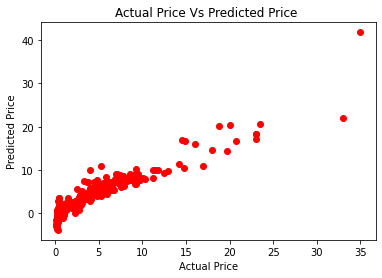

In [14]:
plt.scatter(Y_train,training_prediction,c='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price ")
plt.show()

R Squared ERROR : 0.8365766715027051


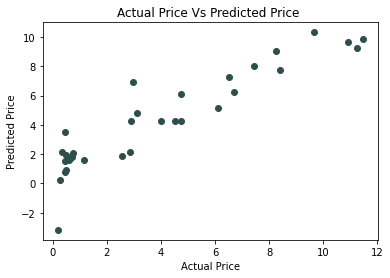

In [15]:
testing_prediction=model.predict(X_test)
score_err=metrics.r2_score(Y_test,testing_prediction)
print("R Squared ERROR :", score_err)
plt.scatter(Y_test,testing_prediction,c='darkslategrey')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price ")
plt.show()